### Step 1: Setup Environment

Tools needed:

###### python
###### Jupyter Notebook/Google Colab
###### Libraries: yfinance,pandas,matplotlib,seaborn,plotly

### Step 2: Import Libraries

In [11]:
import yfinance as yf
import pandas as pf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

##### step 3: Fetch Stock Data

We'll use Yahoo Finance API to fetch historical data for Apple Inc(AAPL):

In [15]:
data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
data.head()

C:\Users\Deep\AppData\Local\Temp\ipykernel_31300\3602349224.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468277,72.528597,71.223274,71.476615,135480400
2020-01-03,71.763710,72.523738,71.539322,71.696152,146322800
2020-01-06,72.335564,72.374169,70.634547,70.885479,118387200
2020-01-07,71.995377,72.600983,71.775811,72.345227,108872000
2020-01-08,73.153496,73.455095,71.698581,71.698581,132079200


In [17]:
close_price = data['Close']['AAPL']

In [19]:
close_price

Date
2020-01-02     72.468277
2020-01-03     71.763710
2020-01-06     72.335564
2020-01-07     71.995377
2020-01-08     73.153496
                 ...    
2024-12-23    254.120682
2024-12-24    257.037506
2024-12-26    257.853790
2024-12-27    254.439224
2024-12-30    251.064499
Name: AAPL, Length: 1257, dtype: float64

#### Step 4: Basic Visualization

Visualize Apple's closing price over time:

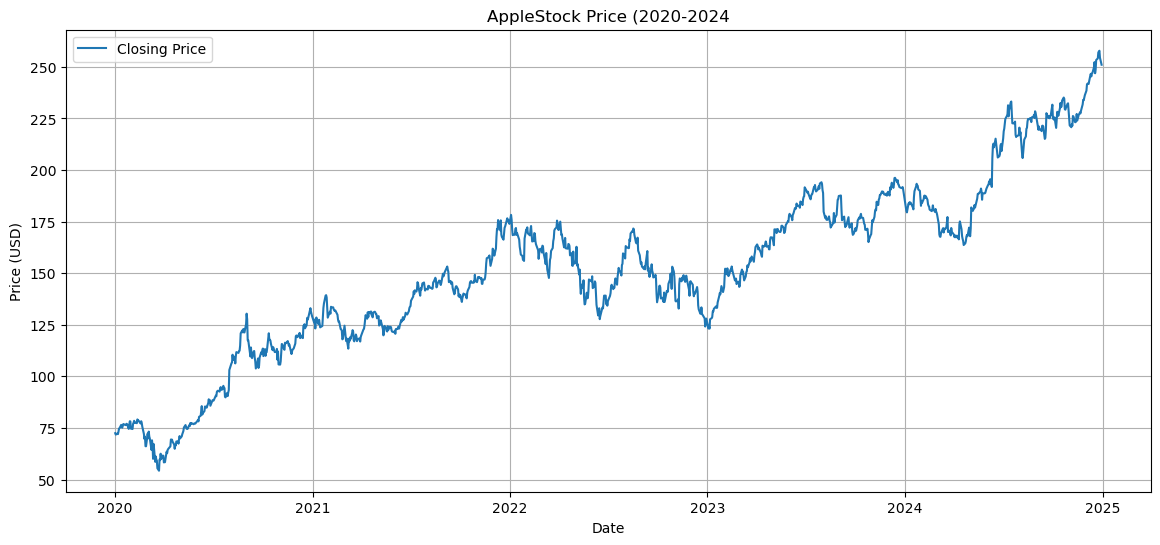

In [23]:
plt.figure(figsize=(14,6))
plt.plot(data['Close'], label='Closing Price')
plt.title('AppleStock Price (2020-2024')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

##### Step 5: Moving Averages
Add 50-day and 200-day moving averages to smooth out noise:

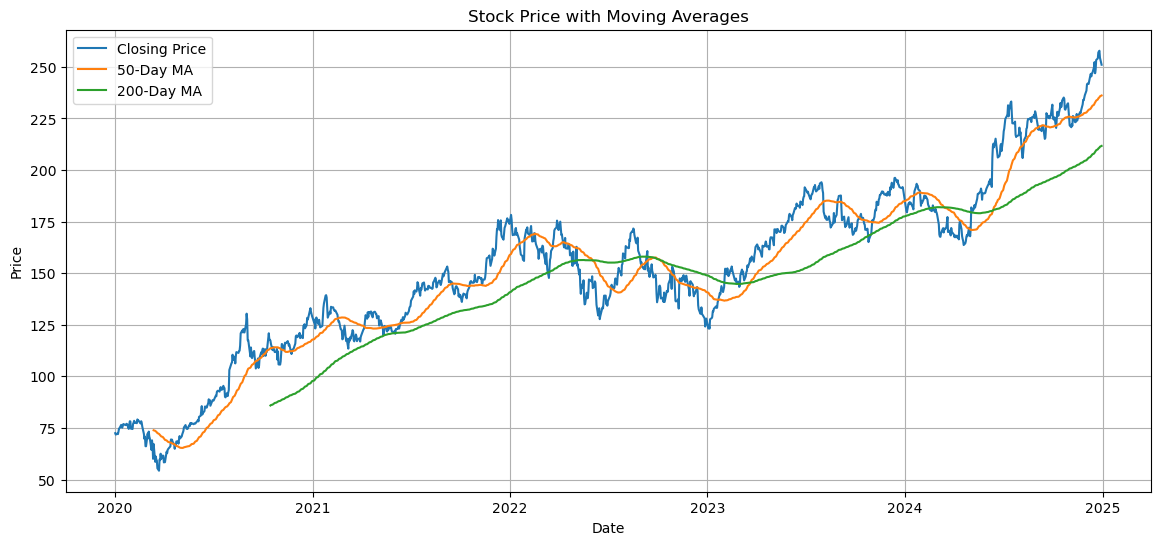

In [26]:
data['MA50'] = data['Close'].rolling(50).mean()
data['MA200'] = data['Close'].rolling(200).mean()

plt.figure(figsize=(14,6))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['MA50'], label='50-Day MA')
plt.plot(data['MA200'], label='200-Day MA')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

##### Step 6: Bollinger Bands
visualize volatility using Bollinger Bands:

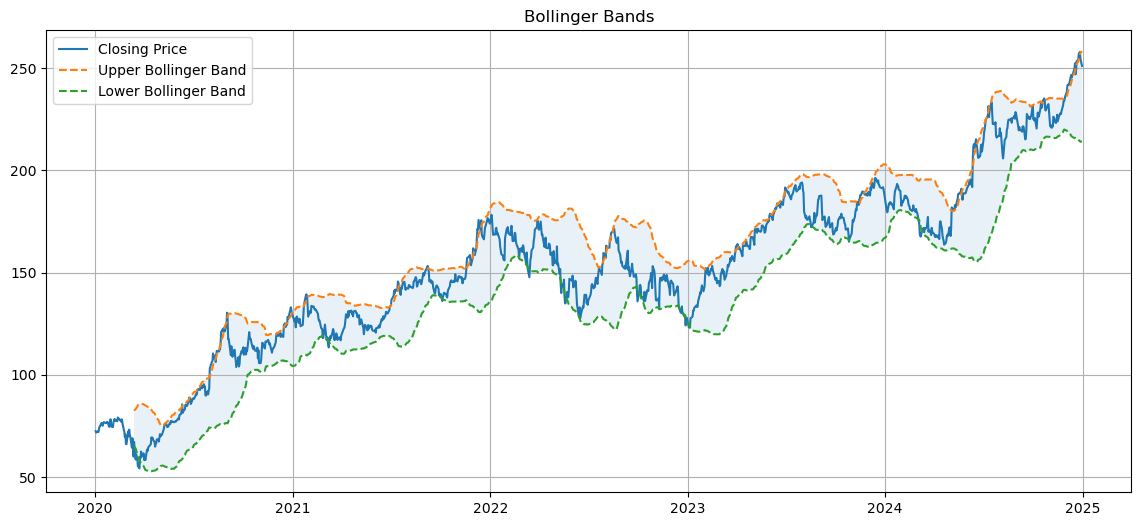

In [33]:
data['MA50'] = close_price.rolling(window=50).mean()

data['UpperBB'] = data['MA50'] + 2 * close_price.rolling(window=50).std()
data['LowerBB'] = data['MA50'] - 2 * close_price.rolling(window=50).std()

plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['UpperBB'], label='Upper Bollinger Band', linestyle='--')
plt.plot(data['LowerBB'], label='Lower Bollinger Band', linestyle='--')
plt.fill_between(data.index, data['LowerBB'], data['UpperBB'], alpha=0.1)
plt.title('Bollinger Bands')
plt.legend()
plt.grid()
plt.show()

##### Step 7: Comparing multiple stocks (Apple, Microsoft, Tesla)
compare Apple with Microsoft and Tesla

In [39]:
tickers = ['AAPL', 'MSFT', 'TSLA']
multi_data = yf.download(tickers, start='2020-01-01', end='2024-12-31')
close_prices = data['Close']
print(close_prices.head())

C:\Users\Deep\AppData\Local\Temp\ipykernel_31300\3965424766.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  multi_data = yf.download(tickers, start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  3 of 3 completed

Ticker           AAPL
Date                 
2020-01-02  72.468277
2020-01-03  71.763710
2020-01-06  72.335564
2020-01-07  71.995377
2020-01-08  73.153496


In [41]:
# Flatten the MultiIndex
flat_data = data.copy()
flat_data.columns = ['{}_{}'.format(price, ticker) for price, ticker in flat_data.columns]
print(flat_data.head())

            Close_AAPL  High_AAPL   Low_AAPL  Open_AAPL  Volume_AAPL  MA50_  \
Date                                                                          
2020-01-02   72.468277  72.528597  71.223274  71.476615    135480400    NaN   
2020-01-03   71.763710  72.523738  71.539322  71.696152    146322800    NaN   
2020-01-06   72.335564  72.374169  70.634547  70.885479    118387200    NaN   
2020-01-07   71.995377  72.600983  71.775811  72.345227    108872000    NaN   
2020-01-08   73.153496  73.455095  71.698581  71.698581    132079200    NaN   

            MA200_  UpperBB_  LowerBB_  
Date                                    
2020-01-02     NaN       NaN       NaN  
2020-01-03     NaN       NaN       NaN  
2020-01-06     NaN       NaN       NaN  
2020-01-07     NaN       NaN       NaN  
2020-01-08     NaN       NaN       NaN  


#### Correlation Heatmap

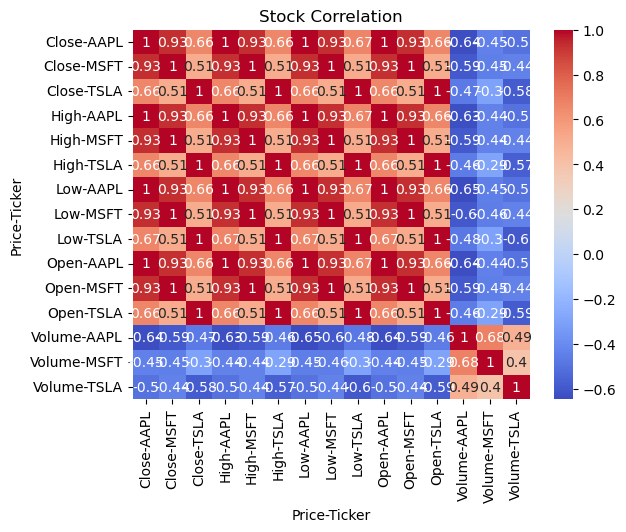

In [48]:
corr = multi_data.corr()
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.title('Stock Correlation')
plt.show()